## Load Data

In [ ]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
train_df = pd.read_csv('./Corona_NLP_train.csv', encoding= 'latin1')
test_df = pd.read_csv('./Corona_NLP_test.csv', encoding= 'latin1')
print('Train shape ', train_df.shape)
print('Test shape ', test_df.shape)

Train shape  (41157, 6)
Test shape  (3798, 6)


## Explore Data

In [ ]:
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
test_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [ ]:
df = pd.concat([train_df, test_df], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44955 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       44955 non-null  int64 
 1   ScreenName     44955 non-null  int64 
 2   Location       35531 non-null  object
 3   TweetAt        44955 non-null  object
 4   OriginalTweet  44955 non-null  object
 5   Sentiment      44955 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


In [ ]:
df[190:200]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
190,3989,48941,London | New York | Munich,16-03-2020,"""I already stocked up on food. Ammo was just t...",Negative
191,3990,48942,"West Hollywood, CA",16-03-2020,Why donÂt we make most grocery stores pickup ...,Negative
192,3991,48943,"Fujairah, UAE.",16-03-2020,Joining hands with the UAE's efforts to contai...,Extremely Positive
193,3992,48944,OnTheEdgeSEMelbourne,16-03-2020,Given restrictions around COVID 19 FIC will be...,Positive
194,3993,48945,somewhere windy,16-03-2020,When people that were out here not taking COVI...,Positive
195,3994,48946,"Las Vegas, NV",16-03-2020,@SarahHollenbeck @MyClearwater @abcactionnews ...,Neutral
196,3995,48947,Commonwealth of Massachusetts,16-03-2020,&gt;@MassGovernor announces $10M loan fund adm...,Extremely Positive
197,3996,48948,"Dallas, TX",16-03-2020,"All the pasta, pasta sauce and pizza were sold...",Neutral
198,3997,48949,USA,16-03-2020,DO NOT PANIC. DO NOT FEAR. \r\r\nFear Is the M...,Extremely Positive
199,3998,48950,"Cambridge, MA",16-03-2020,Our retail store will be closed through the en...,Positive


In [ ]:
df['Location'] = df['Location'].fillna('Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44955 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       44955 non-null  int64 
 1   ScreenName     44955 non-null  int64 
 2   Location       44955 non-null  object
 3   TweetAt        44955 non-null  object
 4   OriginalTweet  44955 non-null  object
 5   Sentiment      44955 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


In [ ]:
df['length_tw'] = df['OriginalTweet'].str.len()

### Plotting distributions

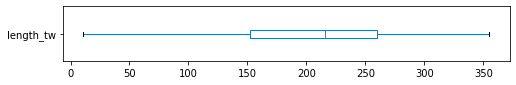

In [ ]:
df['length_tw'].plot(kind='box', vert=False, figsize=(8, 1))

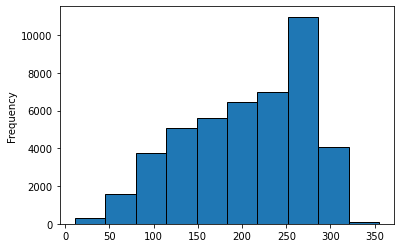

In [ ]:
df['length_tw'].plot(kind='hist', figsize=(6, 4), edgecolor='k')

## Preprocessing Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Sentiment'] = le.fit_transform(train_df['Sentiment'])
test_df['Sentiment'] = le.transform(test_df['Sentiment'])

In [ ]:
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,3
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,4
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,4
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,4
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0


In [ ]:
le.classes_

array(['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral',
       'Positive'], dtype=object)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# clean data
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
HTML_TAG_RE = re.compile('<.*?>') 
STOPWORDS = set(stopwords.words('english'))
EMOJI_RE = re.compile("["u"\U0001F600-\U0001F64F"  # emoticons
                         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                         u"\U0001F680-\U0001F6FF"  # transport & map symbols
                         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                         u"\U00002702-\U000027B0"
                         u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
URL_RE = re.compile("https?://\S+|www\.\S+")

def clean_text(text):
    text = text.lower() # lowercase text
    text = URL_RE.sub('', text)
    text = HTML_TAG_RE.sub('', text)
    text = EMOJI_RE.sub('', text)
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text) 
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

In [ ]:
train_df['OriginalTweet'] = train_df['OriginalTweet'].apply(clean_text)
test_df['OriginalTweet'] = test_df['OriginalTweet'].apply(clean_text)

In [ ]:
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,menyrbie phil_gahan chrisitv,3
1,3800,48752,UK,16-03-2020,advice talk neighbours family exchange phone n...,4
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths give elderly ...,4
3,3802,48754,NaN,16-03-2020,food stock one emptyplease dont panic enough f...,4
4,3803,48755,NaN,16-03-2020,ready go supermarket #covid19 outbreaknot im p...,0


In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_df['Sentiment'])
test_labels = to_categorical(test_df['Sentiment'])

## Modeling

In [ ]:
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, GlobalMaxPooling1D, Dropout, Bidirectional, GRU
from keras.callbacks import EarlyStopping
from keras.models import load_model

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 128

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, 
                      filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', 
                      lower=True)
tokenizer.fit_on_texts(train_df['OriginalTweet'].values)
word_index = tokenizer.word_index
TOTAL_WORDS = len(word_index) + 1

In [ ]:
X.shape

(41157, 250)

In [ ]:
train_labels.shape

(41157, 5)

In [ ]:
X = tokenizer.texts_to_sequences(train_df['OriginalTweet'].values)
X = pad_sequences(X, maxlen= MAX_SEQUENCE_LENGTH)

In [ ]:
X_test = tokenizer.texts_to_sequences(test_df['OriginalTweet'].values)
X_test = pad_sequences(X_test, maxlen= MAX_SEQUENCE_LENGTH)

In [ ]:
print("padding sequence: ", X[1])
print("Original before padding: ", train_df['OriginalTweet'][1])

padding sequence:  [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0  

### LSTM
#### create first model

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout= 0.2, recurrent_dropout=0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation= 'softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 128)          6400000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               91600     
                                                                 
 dense (Dense)               (None, 128)               12928     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                        

In [ ]:
history = model.fit(X, train_labels,
          epochs=10, 
          batch_size=64,
          validation_split=0.1
          )
model.save('lstm_model.h5')

Epoch 1/10
579/579 [==============================] - 649s 1s/step - loss: 1.2567 - accuracy: 0.4542 - val_loss: 0.8750 - val_accuracy: 0.6535
Epoch 2/10
579/579 [==============================] - 648s 1s/step - loss: 0.6958 - accuracy: 0.7442 - val_loss: 0.7221 - val_accuracy: 0.7437
Epoch 3/10
579/579 [==============================] - 646s 1s/step - loss: 0.4615 - accuracy: 0.8412 - val_loss: 0.7873 - val_accuracy: 0.7359
Epoch 4/10
579/579 [==============================] - 642s 1s/step - loss: 0.3290 - accuracy: 0.8870 - val_loss: 0.9467 - val_accuracy: 0.7075
Epoch 5/10
579/579 [==============================] - 647s 1s/step - loss: 0.2404 - accuracy: 0.9184 - val_loss: 1.0090 - val_accuracy: 0.7150
Epoch 6/10
579/579 [==============================] - 646s 1s/step - loss: 0.1858 - accuracy: 0.9374 - val_loss: 1.1230 - val_accuracy: 0.6995
Epoch 7/10
579/579 [==============================] - 643s 1s/step - loss: 0.1471 - accuracy: 0.9501 - val_loss: 1.2748 - val_accuracy: 0.6885

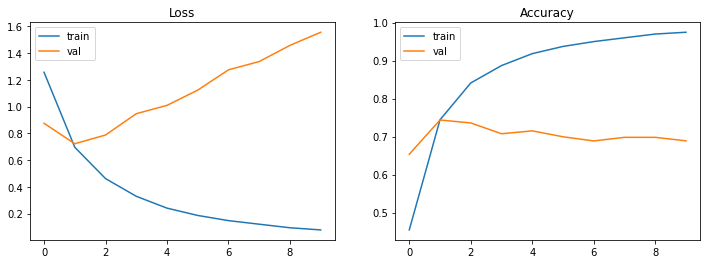

<Figure size 720x216 with 0 Axes>

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 4))
plt.figure(figsize=(10,3))

ax1.set_title('Loss')
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='val')
ax1.legend()

ax2.set_title("Accuracy")
ax2.plot(history.history['accuracy'], label='train')
ax2.plot(history.history['val_accuracy'], label='val')
ax2.legend()

#### evaluate first model

In [ ]:
model = load_model('lstm_model.h5')

In [ ]:
model.evaluate(X_test, test_labels)

119/119 [==============================] - 15s 101ms/step - loss: 1.7596 - accuracy: 0.6567


[1.759566307067871, 0.6566613912582397]

In [ ]:
# Predict test datset
model_pred = np.round(model.predict(X_test))
model_report = classification_report(test_labels, model_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(model_report)

              precision    recall  f1-score   support

           0       0.71      0.56      0.63       592
           1       0.72      0.71      0.71       599
           2       0.61      0.60      0.60      1041
           3       0.72      0.74      0.73       619
           4       0.62      0.67      0.65       947

   micro avg       0.66      0.65      0.66      3798
   macro avg       0.68      0.65      0.66      3798
weighted avg       0.66      0.65      0.66      3798
 samples avg       0.65      0.65      0.65      3798



In [ ]:
text = ["I am so grateful to doctors for curing people from COVID-19", "What the hell! ,government staffs didn't do something to help us."]
text = [clean_text(s) for s in text]

lstm_test_1 = tokenizer.texts_to_sequences(text)
lstm_test_1 = pad_sequences(lstm_test_1, maxlen= MAX_SEQUENCE_LENGTH)

lstm_test_pred_1 = np.round(model.predict(lstm_test_1))
for sentence, pred in zip(text, lstm_test_pred_1):
  print(f"{sentence} has sentimental level at {le.classes_[np.argmax(pred)]}")

grateful doctors curing people covid19 has sentimental level at Extremely Positive
hell government staffs didnt something help us has sentimental level at Negative


#### create second model

In [ ]:
model_2 = Sequential()
model_2.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model_2.add(LSTM(100, dropout=0.2, recurrent_dropout= 0.2, return_sequences=True))
model_2.add(GlobalMaxPooling1D())
model_2.add(Dense(64, activation= 'relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(32, activation= 'relu'))
model_2.add(Dense(5, activation='softmax'))

model_2.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 128)          6400000   
                                                                 
 lstm_1 (LSTM)               (None, 250, 100)          91600     
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_5 (Dense)             (None, 64)                6464      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                      

In [ ]:
history_2 = model_2.fit(X, train_labels,
          epochs=10, 
          batch_size=64,
          validation_split=0.1,
          callbacks = [EarlyStopping(monitor= 'val_loss',
                                      patience= 3,
                                     min_delta= 0.0001)]
          ) 

Epoch 1/10
579/579 [==============================] - 642s 1s/step - loss: 1.1561 - accuracy: 0.5160 - val_loss: 0.7684 - val_accuracy: 0.7225
Epoch 2/10
579/579 [==============================] - 653s 1s/step - loss: 0.6651 - accuracy: 0.7636 - val_loss: 0.7022 - val_accuracy: 0.7517
Epoch 3/10
579/579 [==============================] - 665s 1s/step - loss: 0.4718 - accuracy: 0.8433 - val_loss: 0.7689 - val_accuracy: 0.7396
Epoch 4/10
579/579 [==============================] - 670s 1s/step - loss: 0.3394 - accuracy: 0.8902 - val_loss: 0.8357 - val_accuracy: 0.7357
Epoch 5/10
579/579 [==============================] - 663s 1s/step - loss: 0.2489 - accuracy: 0.9204 - val_loss: 0.9823 - val_accuracy: 0.7121


In [ ]:
model_2.save('lstm_model_2.h5')

#### evaluate second model

In [ ]:
#### Evalute GRU Model
model_2 = load_model('lstm_model_2.h5')

In [ ]:
model_2.evaluate(X_test, test_labels)

119/119 [==============================] - 12s 101ms/step - loss: 1.0831 - accuracy: 0.6764


[1.0830916166305542, 0.6764086484909058]

In [ ]:
# Predict test datset
model_pred_2 = np.round(model_2.predict(X_test))
model_report_2 = classification_report(test_labels, model_pred_2)
print(model_report_2)

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       592
           1       0.78      0.66      0.71       599
           2       0.64      0.61      0.62      1041
           3       0.80      0.71      0.75       619
           4       0.62      0.69      0.65       947

   micro avg       0.69      0.66      0.67      3798
   macro avg       0.71      0.67      0.69      3798
weighted avg       0.69      0.66      0.68      3798
 samples avg       0.66      0.66      0.66      3798



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
text = ["I am so grateful to doctors for curing people from COVID-19", "What the hell! ,government staffs didn't do something to help us."]
text = [clean_text(s) for s in text]

lstm_test_2 = tokenizer.texts_to_sequences(text)
lstm_test_2 = pad_sequences(lstm_test_2, maxlen= MAX_SEQUENCE_LENGTH)

lstm_test_pred_2 = np.round(model_2.predict(lstm_test_2))
for sentence, pred in zip(text, lstm_test_pred_2):
  print(f"{sentence} has sentimental level at {le.classes_[np.argmax(pred)]}")

grateful doctors curing people covid19 has sentimental level at Positive
hell government staffs didnt something help us has sentimental level at Negative


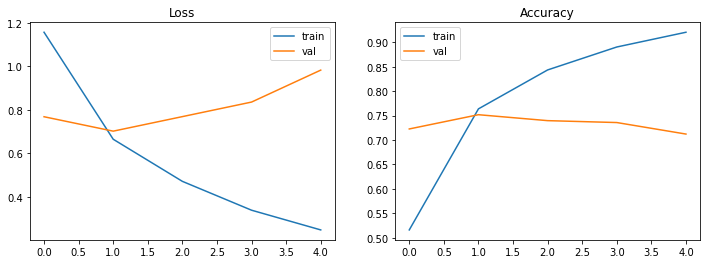

<Figure size 720x216 with 0 Axes>

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 4))
plt.figure(figsize=(10,3))

ax1.set_title('Loss')
ax1.plot(history_2.history['loss'], label='train')
ax1.plot(history_2.history['val_loss'], label='val')
ax1.legend()

ax2.set_title("Accuracy")
ax2.plot(history_2.history['accuracy'], label='train')
ax2.plot(history_2.history['val_accuracy'], label='val')
ax2.legend()

#### test with new text

In [ ]:
model = load_model('lstm_model.h5')
model_2 = load_model('lstm_model_2.h5')

In [ ]:
text = ["I am so grateful to doctors for curing people from COVID-19", "What the hell! ,government staffs didn't do something to help us."]
text = [clean_text(s) for s in text]
text_sequence = tokenizer.texts_to_sequences(text)
text_sequence = pad_sequences(text_sequence, maxlen=MAX_SEQUENCE_LENGTH)
print(text_sequence[0], text[0])

In [ ]:
new_data_pred = model.predict(text_sequence)
class_pred = [le.classes_[np.argmax(pred)] for pred in new_data_pred]
for sentence, class_pred in zip(text, class_pred):
  print(f"{sentence} has sentimental level at {class_pred}")

In [ ]:
new_data_pred_2 = model_2.predict(text_sequence)
class_pred = [le.classes_[np.argmax(pred)] for pred in new_data_pred]
for sentence, class_pred in zip(text, class_pred):
  print(f"{sentence} has sentimental level at {class_pred}")

### Bidirectional LSTM

In [ ]:
BLSTM_model = Sequential()
BLSTM_model.add(Embedding(TOTAL_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
BLSTM_model.add(Bidirectional(LSTM(64, return_sequences=True, dropout=0.1)))
BLSTM_model.add(GlobalMaxPooling1D())
BLSTM_model.add(Dropout(0.5))
BLSTM_model.add(Dense(5, activation='softmax'))

optimizer=Adam(learning_rate=0.00025)
BLSTM_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
BLSTM_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 250, 128)          8279680   
                                                                 
 bidirectional (Bidirectiona  (None, 250, 128)         98816     
 l)                                                              
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 5)                 645       
                                                                 
Total params: 8,379,141
Trainable params: 8,379,141
No

In [ ]:
history_BLSTM = BLSTM_model.fit(X, train_labels,
                    epochs=5, 
                    batch_size=8,
                    validation_split=0.1,
                    ) 
BLSTM_model.save('Blstm_model.h5')

Epoch 1/5
4631/4631 [==============================] - 117s 24ms/step - loss: 1.1846 - accuracy: 0.5048 - val_loss: 0.8572 - val_accuracy: 0.6880
Epoch 2/5
4631/4631 [==============================] - 110s 24ms/step - loss: 0.7369 - accuracy: 0.7375 - val_loss: 0.7618 - val_accuracy: 0.7257
Epoch 3/5
4631/4631 [==============================] - 110s 24ms/step - loss: 0.5526 - accuracy: 0.8166 - val_loss: 0.7707 - val_accuracy: 0.7189
Epoch 4/5
4631/4631 [==============================] - 111s 24ms/step - loss: 0.4263 - accuracy: 0.8649 - val_loss: 0.9036 - val_accuracy: 0.6944
Epoch 5/5
4631/4631 [==============================] - 110s 24ms/step - loss: 0.3318 - accuracy: 0.8979 - val_loss: 0.9683 - val_accuracy: 0.6968


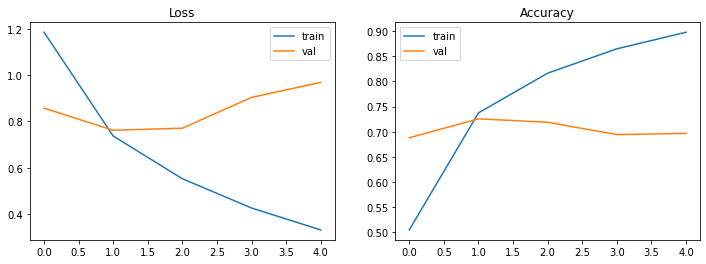

<Figure size 720x216 with 0 Axes>

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 4))
plt.figure(figsize=(10,3))

ax1.set_title('Loss')
ax1.plot(history_BLSTM.history['loss'], label='train')
ax1.plot(history_BLSTM.history['val_loss'], label='val')
ax1.legend()

ax2.set_title("Accuracy")
ax2.plot(history_BLSTM.history['accuracy'], label='train')
ax2.plot(history_BLSTM.history['val_accuracy'], label='val')
ax2.legend()

#### Evalute Bidirectional LSTM Model

In [ ]:
BLSTM_model = load_model('Blstm_model.h5')

In [ ]:
BLSTM_model.evaluate(X_test, test_labels)

119/119 [==============================] - 2s 11ms/step - loss: 1.0889 - accuracy: 0.6688


[1.0888676643371582, 0.6687730550765991]

In [ ]:
# Predict test datset
model_pred = np.round(BLSTM_model.predict(X_test))
model_report = classification_report(test_labels, model_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(model_report)

              precision    recall  f1-score   support

           0       0.75      0.60      0.67       592
           1       0.81      0.68      0.74       599
           2       0.61      0.64      0.62      1041
           3       0.75      0.69      0.72       619
           4       0.62      0.67      0.65       947

   micro avg       0.68      0.66      0.67      3798
   macro avg       0.71      0.66      0.68      3798
weighted avg       0.69      0.66      0.67      3798
 samples avg       0.66      0.66      0.66      3798



#### Test with new text

In [ ]:
model = load_model('lstm_model.h5')

In [ ]:
text = ["I am so grateful to doctors for curing people from COVID-19", "What the hell! ,government staffs didn't do something to help us."]
text = [clean_text(s) for s in text]
text_sequence = tokenizer.texts_to_sequences(text)
text_sequence = pad_sequences(text_sequence, maxlen=MAX_SEQUENCE_LENGTH)
print(text_sequence[0], text[0])

In [ ]:
new_data_pred = model.predict(text_sequence)
class_pred = [le.classes_[np.argmax(pred)] for pred in new_data_pred]
for sentence, class_pred in zip(text, class_pred):
  print(f"{sentence} has sentimental level at {class_pred}")

In [ ]:
new_data_pred_2 = model_2.predict(text_sequence)
class_pred = [le.classes_[np.argmax(pred)] for pred in new_data_pred]
for sentence, class_pred in zip(text, class_pred):
  print(f"{sentence} has sentimental level at {class_pred}")

### GRU

In [ ]:
GRU_model = Sequential()
GRU_model.add(Embedding(TOTAL_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
GRU_model.add(GRU(64))
GRU_model.add(Dropout(0.5))
GRU_model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
GRU_model.add(Dense(5, activation='softmax'))

optimizer=Adam(learning_rate=0.00025)
GRU_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
GRU_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 250, 128)          8279680   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 5)                 165       
                                                                 
Total params: 8,319,173
Trainable params: 8,319,173
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_GRU = GRU_model.fit(X, train_labels,
                    epochs=3, 
                    batch_size=8,
                    validation_split=0.1,
                    ) 
GRU_model.save('GRU_model.h5')

Epoch 1/3
4631/4631 [==============================] - 64s 13ms/step - loss: 1.3404 - accuracy: 0.4452 - val_loss: 0.9116 - val_accuracy: 0.6662
Epoch 2/3
4631/4631 [==============================] - 62s 13ms/step - loss: 0.7635 - accuracy: 0.7361 - val_loss: 0.7646 - val_accuracy: 0.7257
Epoch 3/3
4631/4631 [==============================] - 61s 13ms/step - loss: 0.5632 - accuracy: 0.8210 - val_loss: 0.7886 - val_accuracy: 0.7191


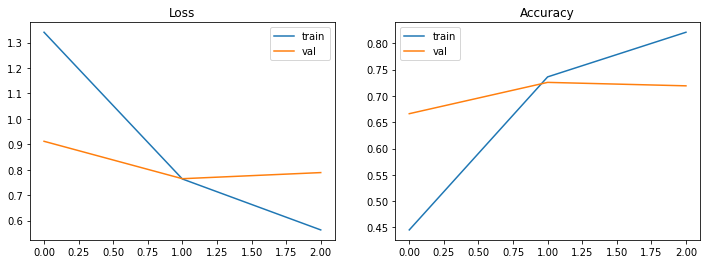

<Figure size 720x216 with 0 Axes>

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 4))
plt.figure(figsize=(10,3))

ax1.set_title('Loss')
ax1.plot(history_GRU.history['loss'], label='train')
ax1.plot(history_GRU.history['val_loss'], label='val')
ax1.legend()

ax2.set_title("Accuracy")
ax2.plot(history_GRU.history['accuracy'], label='train')
ax2.plot(history_GRU.history['val_accuracy'], label='val')
ax2.legend()

#### Evalute GRU Model

In [ ]:
GRU_model = load_model('GRU_model.h5')

In [ ]:
GRU_model.evaluate(X_test, test_labels)

119/119 [==============================] - 1s 6ms/step - loss: 0.9066 - accuracy: 0.6890


[0.9066454768180847, 0.6890468597412109]

In [ ]:
# Predict test datset
model_pred = np.round(GRU_model.predict(X_test))
model_report = classification_report(test_labels, model_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(model_report)

              precision    recall  f1-score   support

           0       0.76      0.60      0.67       592
           1       0.86      0.63      0.73       599
           2       0.61      0.68      0.65      1041
           3       0.84      0.69      0.76       619
           4       0.65      0.69      0.67       947

   micro avg       0.71      0.66      0.68      3798
   macro avg       0.74      0.66      0.69      3798
weighted avg       0.72      0.66      0.69      3798
 samples avg       0.66      0.66      0.66      3798



### Logistic Regression

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegressiona

In [ ]:
cv = CountVectorizer()
train_vec = cv.fit_transform(train_df['OriginalTweet'])

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(train_vec, train_df['Sentiment'].values)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
tfidf = TfidfTransformer()
tfidf_train_vec = tfidf.fit_transform(train_vec)

In [ ]:
logistic_model_tfidf = LogisticRegression()
logistic_model_tfidf.fit(tfidf_train_vec,
                         train_df['Sentiment'].values)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

#### test logistic regression model

In [ ]:
test_vec = cv.transform(test_df['OriginalTweet'])
tfidf_test_vec = tfidf.fit_transform(test_vec)

In [ ]:
test_predictions = logistic_model.predict(test_vec)
print(classification_report(test_predictions, test_df['Sentiment'].values))

              precision    recall  f1-score   support

           0       0.52      0.64      0.57       484
           1       0.61      0.71      0.65       511
           2       0.53      0.52      0.53      1068
           3       0.68      0.62      0.65       679
           4       0.61      0.55      0.58      1056

    accuracy                           0.59      3798
   macro avg       0.59      0.61      0.60      3798
weighted avg       0.59      0.59      0.59      3798



In [ ]:
test_predictions = logistic_model_tfidf.predict(test_vec)
print(classification_report(test_predictions, test_df['Sentiment'].values))

              precision    recall  f1-score   support

           0       0.65      0.47      0.55       827
           1       0.69      0.55      0.61       752
           2       0.29      0.51      0.37       588
           3       0.71      0.52      0.60       856
           4       0.42      0.51      0.46       775

    accuracy                           0.51      3798
   macro avg       0.55      0.51      0.52      3798
weighted avg       0.57      0.51      0.53      3798



In [ ]:
text = ["I am so grateful to doctors for curing people from COVID-19", "What the hell! ,government staffs didn't do something to help us."]
text = [clean_text(s) for s in text]
text_vec = cv.transform(text)
text_pred = logistic_model.predict(text_vec)

In [ ]:
for sentence, pred in zip(text, text_pred):
  print(f"{sentence} has sentimental level at {le.classes_[pred]}")

grateful doctors curing people covid19 has sentimental level at Extremely Positive
hell government staffs didnt something help us has sentimental level at Negative


In [ ]:
text_tfidf_pred = logistic_model_tfidf.predict(text_vec)
for sentence, pred in zip(text, text_tfidf_pred):
  print(f"{sentence} has sentimental level at {le.classes_[pred]}")

grateful doctors curing people covid19 has sentimental level at Extremely Positive
hell government staffs didnt something help us has sentimental level at Extremely Positive


### KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.5, max_features=2000,
                                 min_df=2, stop_words='english',
                                 use_idf=True)
X = vectorizer.fit_transform(train_df['OriginalTweet'])

In [ ]:
km = KMeans(n_clusters=5, max_iter=100, n_init=55)
km.fit(X)

KMeans(max_iter=100, n_clusters=5, n_init=55)

In [ ]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

In [ ]:
terms = vectorizer.get_feature_names()
for i in range(5):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :30]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: supermarket food coronavirus people panic covid19 stock buying need shelves amp demand covid_19 19 workers covid like buy local going staff dont covid2019 time stop home work help delivery im
Cluster 1: prices covid19 consumer coronavirus oil amp pandemic 19 covid crisis price impact demand new gas market help time covid_19 people business outbreak global economy low amid consumers home retail companies
Cluster 2: store grocery coronavirus workers covid19 people retail covid_19 employees going like work amp socialdistancing stores covid2019 thank pandemic time im need dont 19 home line working today essential food local
Cluster 3: sanitizer toiletpaper coronavirus hand toilet paper covid19 hands use corona covid_19 soap quarantine masks toiletpapercrisis tp handsanitizer amp people make pandemic toiletpaperpanic alcohol need virus like wash making coronaviruspandemic stayhome
Cluster 4: online shopping covid19 coronavirus delivery 19 home covid grocery amp people amazon shop

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### NaiveBayes

TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words=None)
X_train_tfidf = tfidf.fit_transform(train_df['OriginalTweet'] )
X_test_tfidf = tfidf.transform(test_df["OriginalTweet"])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_tfidf = MultinomialNB()
naive_bayes_tfidf.fit(X_train_tfidf, train_df['Sentiment'].values)

MultinomialNB()

CountVectorizer

In [ ]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(train_df['OriginalTweet'] )
X_test_cv = cv.transform(test_df["OriginalTweet"])

In [ ]:
naive_bayes_cv = MultinomialNB()
naive_bayes_cv.fit(X_train_cv, train_df['Sentiment'].values)

MultinomialNB()

In [ ]:
nb_cv_predict = naive_bayes_cv.predict(X_test_cv)

### Test Naive Bayes

In [ ]:
nb_tfidf_predict = naive_bayes_tfidf.predict(X_test_tfidf)
print(classification_report(nb_tfidf_predict, test_df['Sentiment'].values))

              precision    recall  f1-score   support

           0       0.01      0.75      0.01         4
           1       0.03      1.00      0.05        16
           2       0.39      0.39      0.39      1030
           3       0.06      0.83      0.11        42
           4       0.91      0.32      0.47      2706

    accuracy                           0.35      3798
   macro avg       0.28      0.66      0.21      3798
weighted avg       0.75      0.35      0.44      3798



In [ ]:
nb_cv_predict = naive_bayes_cv.predict(X_test_cv)
print(classification_report(nb_cv_predict, test_df['Sentiment'].values))

              precision    recall  f1-score   support

           0       0.22      0.61      0.33       217
           1       0.28      0.70      0.40       238
           2       0.56      0.42      0.48      1369
           3       0.22      0.65      0.33       207
           4       0.69      0.37      0.48      1767

    accuracy                           0.44      3798
   macro avg       0.39      0.55      0.40      3798
weighted avg       0.57      0.44      0.46      3798



In [ ]:
text = ["I am so grateful to doctors for curing people from COVID-19", "What the hell! ,government staffs didn't do something to help us."]
text = [clean_text(s) for s in text]
text_vec = tfidf.transform(text)
text_tfidf_pred = naive_bayes_tfidf.predict(text_vec)

In [ ]:
for sentence, pred in zip(text, text_tfidf_pred):
  print(f"{sentence} has sentimental level at {le.classes_[pred]}")

grateful doctors curing people covid19 has sentimental level at Extremely Positive
hell government staffs didnt something help us has sentimental level at Positive


In [ ]:
text_cv_pred = naive_bayes_cv.predict(text_vec)
for sentence, pred in zip(text, text_cv_pred):
  print(f"{sentence} has sentimental level at {le.classes_[pred]}")

grateful doctors curing people covid19 has sentimental level at Extremely Positive
hell government staffs didnt something help us has sentimental level at Extremely Positive
